### Задание 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
* zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
* ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
### Решение.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)
y_pred = a + b * X
print('С intercept')
print(f'a={a}, b={b}')
print()

# без intercept
B = y@X*((X.T@X)**(-1))
print('Без intercept')
print(f'b={B}')
y_1 = B * X

С intercept
a=444.1773573243596, b=2.620538882402765

Без intercept
b=5.889820420132688


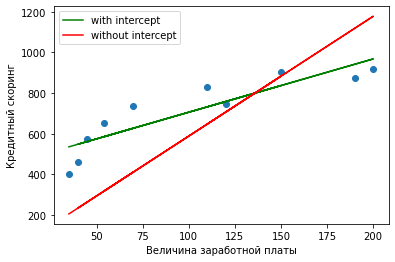

Среднеквадратичная ошибка с intercept равна 6470.414201176658
Среднеквадратичная ошибка без intercept равна 56516.8584157194


In [31]:
df = pd.DataFrame({'X': X, 'y': y, 'y_pred': y_pred, 'y_1': y_1}, columns=['X', 'y', 'y_pred', 'y_1'])

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['y_pred'], "-g", label="with intercept")
plt.plot(df['X'], df['y_1'], "-r", label="without intercept")
plt.xlabel('Величина заработной платы')
plt.ylabel('Кредитный скоринг')
plt.legend(loc="upper left")
plt.show()

mse = ((y - y_pred)**2).sum()/len(y)
print(f'Среднеквадратичная ошибка с intercept равна {mse}')
mse_1 = ((y - y_1)**2).sum()/len(y)
print(f'Среднеквадратичная ошибка без intercept равна {mse_1}')

### Задание 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).
### Решение.

In [32]:
def mse(X, y, B):
    return np.sum((B * X - y)**2)/len(y)

def gde(X, y, alpha=1e-6, err=1e-8):
    B = 0.01
    mse_prev = 10**5
    
    while abs(mse_prev - mse(X, y, B)) > err:
        mse_prev = mse(X, y, B)
        B -= alpha * 2 * np.sum((B * X - y) * X) / len(y)
    return B

print(f'B={gde(X, y)}')

B=5.889816916279482


### Задание 3.
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?
### Решение.
В случае если генеральная дисперсия $\sigma^2$ известна, используется таблица значений функции Лапласа. В случае если генеральная дисперсия $\sigma^2$ неизвестна, используется таблица распределения Стьюдента.

### Задание 4.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение.

In [71]:
def mse_(X, y, B):
    return np.sum((B @ X - y)**2)/len(y)

def gde_(X, y, alpha=1e-5, err=1e-10):
    B = np.array([0.1, 0.1])
    mse_prev = 10**5
    while abs(mse_prev - mse_(X, y, B)) > err:
        mse_prev = mse_(X, y, B)
        B -= alpha * 2 * ((B @ X - y) @ X.T) / len(y)
    return B

P = np.array([[1]*len(y), [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]], dtype=np.float64)
Q = gde_(P, y)
print(f'B0={Q[0]}, B1={Q[1]}')

B0=444.1708649293089, B1=2.6205866693007906
